# Perdiction of sales

### Problem Statement
This dataset represents sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store are available. The aim is to build a predictive model and find out the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

---------------------

### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

In [6]:
# From day 1... didn't improve much so 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
df = pd.read_csv("fixed_data.csv")
df.head()

# Okay - try:
# change location type tier to one collun ordinal, supermarket type as well
# eliminate correlation
# scale

,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Years_Opened,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Broad_Item_Type_DR,Broad_Item_Type_FD,Broad_Item_Type_NC
0,0,9.30,0.016047,249.8092,1999,3735.1380,22,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,1,5.92,0.019278,48.2692,2009,443.4228,12,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,2,17.50,0.016760,141.6180,1999,2097.2700,22,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,3,19.20,0.000000,182.0950,1998,732.3800,23,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,4,8.93,0.000000,53.8614,1987,994.7052,34,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [4]:
print(df.shape)
df.head()

y = df.Item_Outlet_Sales
X = df.drop(columns=['Item_Outlet_Sales', 'Outlet_Establishment_Year'])
y.head()

(8523, 39)


0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

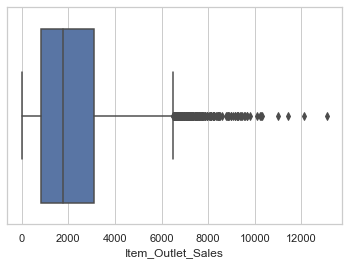

In [7]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=y)

In [ ]:
# should look at other distributions as well - see if need to log transform etc..(box plot it up)

In [8]:
# split - so can get baseline 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,test_size=0.25, random_state=101)

### Baseline (Linear Regression)

In [9]:
# creating linear regression for a BASELINE
lr = LinearRegression()
lr.fit(X_train,y_train)
y_lr_baseline = lr.predict(X_test)

lr_baseline_MSE = mean_squared_error(y_test,y_lr_baseline) 
lr_baseline_r2 = r2_score(y_test,y_lr_baseline) 

print("MSE_lr", lr_baseline_MSE)
print("r2_lr", lr_baseline_r2)

MSE_lr 1187341.370331689
r2_lr 0.5628640556950868


We have covered how to prepare a dataset and the process of feature engineering two weeks ago. In addition, we have already created Lasso and Ridge regressions on Monday. Today, we will be working with the ensemble methods. 

-------------------------
### Model Building: Ensemble Models

Try out the different ensemble models (Random Forest Regressor, Gradient Boosting, XGBoost)
- **Note:** Spend some time on the documention for each of these models.
- **Note:** As you spend time on this challenge, it is suggested to review how each of these models work and how they compare to each other.

Calculate the **mean squared error** on the test set. Explore how different parameters of the model affect the results and the performance of the model. (*Stretch: Create a visualization to display this information*)

- Use GridSearchCV to find optimal paramaters of models.
- Compare agains the Lasso and Ridge Regression models from Monday.

**Questions to answer:**
- Which ensemble model performed the best? 

## Random Forests


#### a) Do a BASELINE RANDOM FOREST

In [13]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a regressor
rf_b=RandomForestRegressor()

#Train the model using the training sets 
rf_b.fit(X_train,y_train)

# predict and evaluate
y_pred=rf_b.predict(X_test)

r2_score =rf_b.score(X_test, y_test)
mse=mean_squared_error(y_test, y_pred)
# Evaluating MSE/ r^2
print("MSE:",mse, "R^2:",r2_score )

MSE: 1164254.9179313257 R^2: 0.5713636485020519


#### a) NOW GRID SEARCH IT 

In [14]:
# WHY IS THIS NOT WORKING??

# param_grid = {'n_estimators': [10,50,100,200], 'max_depth': [1,3,5]}
param_grid = {'n_estimators': [100,200,300,400],
              'max_depth': [1,3,5,6,8], 
              'max_features':['auto','sqrt','log2']
             }

# no more than 500 mzx!!
# max depth - 10 max!! ideally 3-5
# give combo of low and high, then where is it lying 
# 2 step process

reg = RandomForestRegressor()
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring = 'r2')
grid_search.fit(X_train, y_train)
best_result = grid_search.best_estimator_
best_result


RandomForestRegressor(max_depth=6, n_estimators=300)

In [10]:
best_result.score
# see week 7 miniproject

NameError: name 'best_result' is not defined

In [14]:
print(grid_search.best_score_)

reg = RandomForestRegressor(max_depth=5)
reg.fit(X_train, y_train)

r2_score =reg.score(X_test, y_test)
mse=mean_squared_error(y_test, y_pred)
# Evaluating MSE/ r^2
print("MSE:",mse, "R^2:",r2_score )

0.5973611652620331
MSE: 1161684.3200991808 R^2: 0.6036253906111411


#### c) Finding important features

In [15]:
import pandas as pd
feature_imp = pd.Series(reg.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp.head(5)

  

Item_MRP                         0.553390
Outlet_Type_Grocery Store        0.316018
Outlet_Type_Supermarket Type3    0.083623
Years_Opened                     0.038565
Item_Visibility                  0.003550
dtype: float64

No handles with labels found to put in legend.


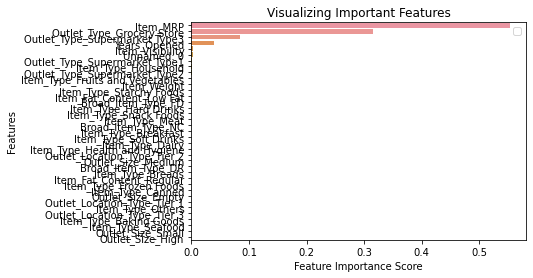

In [16]:
# Find important features, reduce and try again
# visualize the feature importance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### d) after non-important features removed, do it again:
* baseline/ evaluate
* grid search/ evaluate

In [20]:
X_tree_reduced = X[['Outlet_Type_Grocery Store','Item_MRP','Outlet_Type_Supermarket Type3', 'Years_Opened','Item_Visibility']]   
# X_tree_reduced.head()

# split - so can get baseline - really should be stratifying y
X_train, X_test, y_train, y_test = train_test_split(X_tree_reduced, y, train_size=0.75,test_size=0.25, random_state=101)


# creating linear regression for a BASELINE
lr = LinearRegression()
lr.fit(X_train,y_train)
y_lr_baseline = lr.predict(X_test)

lr_baseline_MSE = mean_squared_error(y_test,y_lr_baseline) 
# lr_baseline_r2 = r2_score(y_test,y_lr_baseline) 
# lr_baseline_r2 = r2_score(y_test, y_lr_baseline) 
print("MSE_lr", lr_baseline_MSE)
print("r2_lr", lr_baseline_r2)

# BIGGER ERROR THAN INITIAL BASELINE

MSE_lr 1190706.4597332885


In [21]:
# BASELINE RANDOM FOREST

#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a regressor
rf_b=RandomForestRegressor()

#Train the model using the training sets 
rf_b.fit(X_train,y_train)

# predict and evaluate
y_pred=rf_b.predict(X_test)

r2_score =rf_b.score(X_test, y_test)
mse=mean_squared_error(y_test, y_pred)
# Evaluating MSE/ r^2
print("MSE:",mse, "R^2:",r2_score )

MSE: 1253902.2888995819 R^2: 0.5383587443170709


In [22]:
# GRID SEARCH RANDOM FOREST
# param_grid = {'n_estimators': [10,50,100,200], 'max_depth': [1,3,5]}
param_grid = {'n_estimators': [100,200,300,400], 'max_depth': [1,3,5,6,8]}

# no more than 500 mzx!!
# max depth - 10 max!! ideally 3-5
# give combo of low and high, then where is it lying 
# 2 step process

reg = RandomForestRegressor()
grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_result = grid_search.best_estimator_
best_result

RandomForestRegressor(max_depth=6)

In [23]:
print(grid_search.best_score_)

reg = RandomForestRegressor(max_depth=6, n_estimators=300)
reg.fit(X_train, y_train)

r2_score =reg.score(X_test, y_test)
mse=mean_squared_error(y_test, y_pred)
# Evaluating MSE/ r^2
print("MSE:",mse, "R^2:",r2_score )

0.5977246108727371
MSE: 1253902.2888995819 R^2: 0.6002762663067163


##  Gradient Boosting

Gradient boosting is a generalization of AdaBoosting, improving the performance of the approach and introducing ideas from bootstrap aggregation to further improve the models, such as randomly sampling the samples and features when fitting ensemble members.

Gradient boosting performs well, if not the best, on a wide range of tabular datasets, and versions of the algorithm like XGBoost and LightBoost often play an important role in winning machine learning competitions.
(source: https://machinelearningmastery.com/gradient-boosting-machine-ensemble-in-python/)

#### a) Do a BASELINE Gradient Boosting

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold # for classifyer 
from sklearn.ensemble import GradientBoostingClassifier # for continuous
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from numpy import mean
from numpy import std

In [25]:
# USE INITIAL X 
#Import Random Forest Model
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# #### RUN A FEW TIMES AND COMPARE AVERAGE (stocastic nature of result)

Mean Accuracy: -768.571 (27.831)
MAE: -768.571 (27.831)


In [26]:
# gradient ensemble for making predictions

# fit 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_score =model.score(X_test, y_test)


print( r2_score)

0.6007393548022161


In [30]:
# number trees, number samplesm, number features (max_features, learning rate (default 0.1), tree depth

# params = learning_rate (default 0.1
#                         n_estimators - larger better
#                         minsample split??

#  GRID SEARCH #### DO THIS FRIDAY 
from sklearn.datasets import make_classification
# from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import  GradientBoostingRegressor
                        


# define the model with default hyperparameters
model =  GradientBoostingRegressor()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
                        
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
                        
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error')

# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -766.976378 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
-1358.642312 (33.764552) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
-1358.641390 (33.763209) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
-1358.640611 (33.763461) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
-1355.613378 (33.737974) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
-1355.608619 (33.739511) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
-1355.610527 (33.737958) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
-1351.851290 (33.709955) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
-1351.841814 (33.708931) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
-1351.8

In [ ]:
# A box and whisker plot is created for the distribution of accuracy scores for each configured tree depth. (each parameter see how effects)

In [38]:
print(grid_result.best_params_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}


In [41]:

# summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_params_))
# fit 
model = GradientBoostingRegressor(learning_rate= 0.01, max_depth= 3, n_estimators= 500, subsample= 1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_score =model.score(X_test, y_test)


print( r2_score)

0.6045853059164594


## XGBoost
#### a) Do a BASELINE XGBoost

https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

df = pd.read_csv("fixed_data.csv")
# df.head()
# print(df.shape)
# df.head()

y = df.Item_Outlet_Sales
X = df.drop(columns=['Item_Outlet_Sales', 'Outlet_Establishment_Year'])
# y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,test_size=0.25, random_state=101)

In [ ]:
# This only works on Colab

In [ ]:
data_dmatrix = xgb.DMatrix(data=X, label=y)
reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 6, 
                          alpha = 10, 
                          n_estimators = 10)

In [4]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

1.4.2


In [ ]:
r2_score =reg.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Root Mean Squared Error handbombed
print("RMSE: %f" % (rmse))
print( r2_score)

In [ ]:
# Hyperparameters - number of trees (n_estimators default 100 - 10 - 5000)
# tree depth, 1- 10, learning rate (eta - 0.3 - 0.0001 - 1.0, number samples, number features

# SHOULD DO GRID SEARCH HERE!

params = {"objective":"reg:linear",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 6, 
          'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, # using your special dmatrix we made b4
                    params=params, # hyper parameters
                    nfold=3,
                    num_boost_round=50,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=42)

# A box and whisker plot is created for the distribution of accuracy scores for each configured number of trees. (each cv)

# could see the general trend of increasing model performance and ensemble size - from web example.

In [ ]:
cv_results.head()

In [ ]:
# vis trees
import matplotlib.pyplot as plt

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [200, 50]
plt.show()

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [30, 15]
plt.show() 